#

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd
import pandas as pd
DATA_FILE = 'data/kc_house_data.csv'
print(tf.__version__)

1.4.0


In [450]:
# Step 1: read in data from the .xls file, export only the fields that we need
raw_data=pd.read_csv(DATA_FILE, usecols=['price','sqft_living'])
raw_data.head()

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680


In [498]:
#Step 2 Do some data cleaning
df = raw_data
n_samples= df.shape[0]-1
print("Samples: %i" % n_samples)
df=df.dropna()  #drop mising values
df=df.sample(100)  #trim random samples for time
df=df.applymap(lambda x: float(x))  #map all strings and ints to floats
n_samples= df.shape[0]-1
print("Truncated Samples: %i" % n_samples)
df.head()

Samples: 21612
Truncated Samples: 99


,price,sqft_living
7548,575000.0,1490.0
8763,655000.0,3690.0
14355,850000.0,1590.0
11733,295000.0,720.0
8891,240000.0,1880.0


In [494]:
#convert dataframe to arrays for dependent and independent variables
y = df['price'].values
x = df['sqft_living'].values

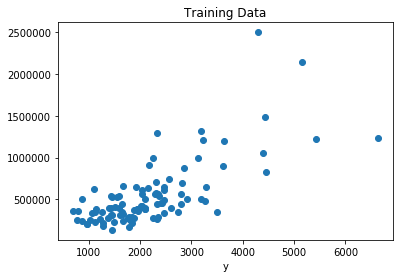

In [495]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show()

In [496]:
#defining the placeholders X and Y, 
#so that we can feed our training examples X and Y into the optimizer during the training process.
X = tf.placeholder("float") 
Y = tf.placeholder("float")

#defining the weight and bias
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 

#hyper parameters
learning_rate = 0.01
training_epochs = 1000

# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 


# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 50 : cost = nan W = nan b = nan
Epoch 100 : cost = nan W = nan b = nan
Epoch 150 : cost = nan W = nan b = nan
Epoch 200 : cost = nan W = nan b = nan
Epoch 250 : cost = nan W = nan b = nan
Epoch 300 : cost = nan W = nan b = nan
Epoch 350 : cost = nan W = nan b = nan
Epoch 400 : cost = nan W = nan b = nan
Epoch 450 : cost = nan W = nan b = nan
Epoch 500 : cost = nan W = nan b = nan
Epoch 550 : cost = nan W = nan b = nan
Epoch 600 : cost = nan W = nan b = nan
Epoch 650 : cost = nan W = nan b = nan
Epoch 700 : cost = nan W = nan b = nan
Epoch 750 : cost = nan W = nan b = nan
Epoch 800 : cost = nan W = nan b = nan
Epoch 850 : cost = nan W = nan b = nan
Epoch 900 : cost = nan W = nan b = nan
Epoch 950 : cost = nan W = nan b = nan
Epoch 1000 : cost = nan W = nan b = nan


In [499]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 


Training cost = nan Weight = nan bias = nan 



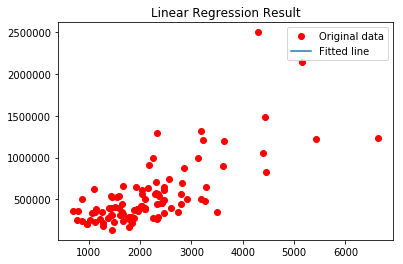

In [500]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 

In [471]:
# using linear function y = Wx + b
lm = W*x + b

#calculating squared error
loss = tf.reduce_sum(tf.square(lm - y))

#using Gradient Descent with learning rate 0.01
optimizer = tf.train.GradientDescentOptimizer(0.01)

#minimizing loss
train = optimizer.minimize(loss)

In [472]:
session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)

#training model for 1000 iterations
for i in range(1000):
    session.run(train, {x:x_train, y:y_train})

#final values of W and b
print(session.run([W,b]))
#output of the model
print(session.run(lm,{x:[5,6,7,8]}))

[array([-0.99999887], dtype=float32), array([ 0.9999966], dtype=float32)]
[-3.99999762 -4.99999666 -5.99999523 -6.99999428]


In [406]:
df.head()
y_predictions =df['sqft_living'].apply(lambda x: x*w_value + b_value)
print(y_predictions)
# plt.plot(x_data, y_data,'bo', label='Real data')
# plt.plot(x_data,y_predictions, 'r', label='Predicted data') 
# plt.legend()
# plt.show()

1       []
2       []
3       []
4       []
5       []
6       []
7       []
8       []
9       []
10      []
11      []
12      []
13      []
14      []
15      []
16      []
17      []
18      []
19      []
20      []
21      []
22      []
23      []
24      []
25      []
26      []
27      []
28      []
29      []
30      []
        ..
4970    []
4971    []
4972    []
4973    []
4974    []
4975    []
4976    []
4977    []
4978    []
4979    []
4980    []
4981    []
4982    []
4983    []
4984    []
4985    []
4986    []
4987    []
4988    []
4989    []
4990    []
4991    []
4992    []
4993    []
4994    []
4995    []
4996    []
4997    []
4998    []
4999    []
Name: sqft_living, Length: 4999, dtype: object
